In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../../data/fraud test.csv")
df.drop("Unnamed: 0", inplace=True, axis=1)

In [3]:
### Remove a 50% of data for non-fraud
X = int(round((df['is_fraud'].value_counts()[0]) * 0.5, 0))

non_fraud_rows = df[df['is_fraud'] == 0]
rows_to_remove = non_fraud_rows.sample(n=X, random_state=100)
df = df.drop(rows_to_remove.index)

In [4]:
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
1,21/06/2020 12:14,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,...,40.3207,-110.4360,302,"Sales professional, IT",17/01/1990,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,21/06/2020 12:14,3.598220e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,...,40.6729,-73.5365,34496,"Librarian, public",21/10/1970,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,21/06/2020 12:15,3.591920e+15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,...,28.5697,-80.8191,54767,Set designer,25/07/1987,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
5,21/06/2020 12:15,3.040770e+13,fraud_Daugherty LLC,kids_pets,19.55,Danielle,Evans,F,76752 David Lodge Apt. 064,Breesport,...,42.1939,-76.7361,520,Psychotherapist,13/10/1991,798db04aaceb4febd084f1a7c404da93,1371816937,41.747157,-77.584197,0
7,21/06/2020 12:15,3.589290e+15,fraud_Reichel LLC,personal_care,10.37,Paula,Estrada,F,350 Stacy Glens,Spencer,...,43.7557,-97.5936,343,"Development worker, international aid",05/03/1972,8be473af4f05fc6146ea55ace73e7ca2,1371816950,44.495498,-97.728453,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 278932 entries, 1 to 555717
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   trans_date_trans_time  278932 non-null  object 
 1   cc_num                 278932 non-null  float64
 2   merchant               278932 non-null  object 
 3   category               278932 non-null  object 
 4   amt                    278932 non-null  float64
 5   first                  278932 non-null  object 
 6   last                   278932 non-null  object 
 7   gender                 278932 non-null  object 
 8   street                 278932 non-null  object 
 9   city                   278932 non-null  object 
 10  state                  278932 non-null  object 
 11  zip                    278932 non-null  int64  
 12  lat                    278932 non-null  float64
 13  long                   278932 non-null  float64
 14  city_pop               278932 non-null  i

In [6]:
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'], dayfirst=True)

In [7]:
df.corr(numeric_only=True)['is_fraud'].sort_values(ascending=False)

is_fraud      1.000000
amt           0.259012
lat           0.008410
merch_lat     0.008327
long         -0.001240
merch_long   -0.001368
cc_num       -0.002073
zip          -0.003325
city_pop     -0.006940
unix_time    -0.018317
Name: is_fraud, dtype: float64

In [8]:
drop_cols = ["cc_num", "first", "last", "street", "zip", "trans_num"]

for col in drop_cols:
    df.drop(col, axis=1, inplace=True)


In [9]:
df['year'] = df['trans_date_trans_time'].apply(lambda x: x.year) 
df['month'] = df['trans_date_trans_time'].apply(lambda x: x.month) 
df['day'] = df['trans_date_trans_time'].apply(lambda x: x.day) 
df['hour'] = df['trans_date_trans_time'].apply(lambda x: x.hour)
df['minute'] = df['trans_date_trans_time'].apply(lambda x: x.minute) 
df['second'] = df['trans_date_trans_time'].apply(lambda x: x.second) 

In [10]:
df.drop("trans_date_trans_time", axis=1, inplace=True)

In [11]:
df.drop("job", axis=1, inplace=True)

In [12]:
df.head()

,merchant,category,amt,gender,city,state,lat,long,city_pop,dob,unix_time,merch_lat,merch_long,is_fraud,year,month,day,hour,minute,second
1,fraud_Sporer-Keebler,personal_care,29.84,F,Altonah,UT,40.3207,-110.4360,302,17/01/1990,1371816873,39.450498,-109.960431,0,2020,6,21,12,14,0
2,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,F,Bellmore,NY,40.6729,-73.5365,34496,21/10/1970,1371816893,40.495810,-74.196111,0,2020,6,21,12,14,0
3,fraud_Haley Group,misc_pos,60.05,M,Titusville,FL,28.5697,-80.8191,54767,25/07/1987,1371816915,28.812398,-80.883061,0,2020,6,21,12,15,0
5,fraud_Daugherty LLC,kids_pets,19.55,F,Breesport,NY,42.1939,-76.7361,520,13/10/1991,1371816937,41.747157,-77.584197,0,2020,6,21,12,15,0
7,fraud_Reichel LLC,personal_care,10.37,F,Spencer,SD,43.7557,-97.5936,343,05/03/1972,1371816950,44.495498,-97.728453,0,2020,6,21,12,15,0


In [13]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.15, random_state=100)

In [14]:
train_set.head()

,merchant,category,amt,gender,city,state,lat,long,city_pop,dob,unix_time,merch_lat,merch_long,is_fraud,year,month,day,hour,minute,second
107925,fraud_Lynch-Wisozk,home,19.49,F,Orient,WA,48.8878,-118.2105,149,21/06/1978,1375021853,49.060485,-118.014142,0,2020,7,28,14,30,0
463896,fraud_Little Ltd,kids_pets,40.32,F,Rock Springs,WY,41.6060,-109.2300,27971,01/08/1984,1386796765,41.510146,-108.964626,0,2020,12,11,21,19,0
259646,fraud_Hills-Boyer,personal_care,7.55,F,Kansas City,MO,38.9621,-94.5959,545147,18/11/1987,1380055199,38.926373,-94.369897,0,2020,9,24,20,39,0
411090,fraud_Bogisich Inc,grocery_pos,123.13,F,East Andover,ME,44.6084,-70.6993,190,17/04/1970,1385795049,44.447378,-69.892789,0,2020,11,30,7,4,0
286642,"fraud_Swift, Bradtke and Marquardt",grocery_net,44.63,F,Fort Washakie,WY,43.0048,-108.8964,1645,17/02/1986,1381052058,42.931295,-109.291392,0,2020,10,6,9,34,0


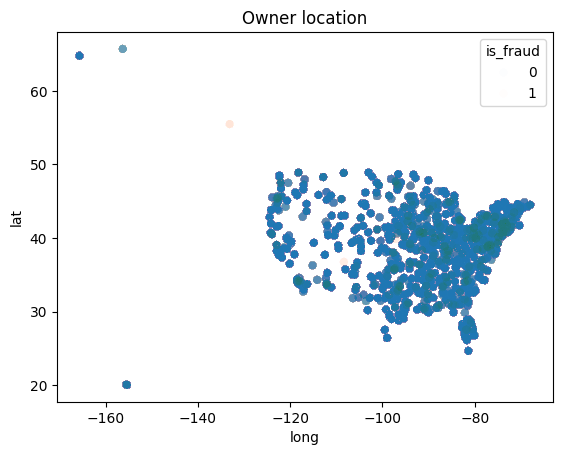

In [15]:
sns.scatterplot(x='long', y='lat', hue='is_fraud', data=train_set, alpha=0.01)
plt.title('Owner location')
plt.show()

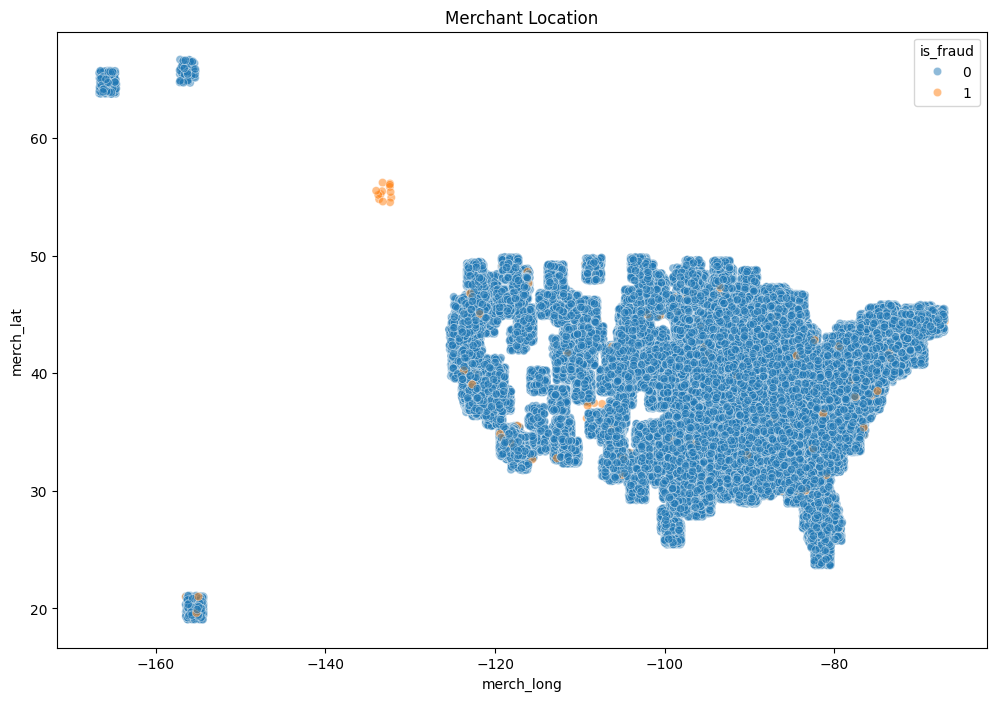

In [16]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='merch_long', y='merch_lat', hue='is_fraud', data=train_set, alpha=0.5)
plt.title('Merchant Location')
plt.show()

In [17]:
train_set.head()

,merchant,category,amt,gender,city,state,lat,long,city_pop,dob,unix_time,merch_lat,merch_long,is_fraud,year,month,day,hour,minute,second
107925,fraud_Lynch-Wisozk,home,19.49,F,Orient,WA,48.8878,-118.2105,149,21/06/1978,1375021853,49.060485,-118.014142,0,2020,7,28,14,30,0
463896,fraud_Little Ltd,kids_pets,40.32,F,Rock Springs,WY,41.6060,-109.2300,27971,01/08/1984,1386796765,41.510146,-108.964626,0,2020,12,11,21,19,0
259646,fraud_Hills-Boyer,personal_care,7.55,F,Kansas City,MO,38.9621,-94.5959,545147,18/11/1987,1380055199,38.926373,-94.369897,0,2020,9,24,20,39,0
411090,fraud_Bogisich Inc,grocery_pos,123.13,F,East Andover,ME,44.6084,-70.6993,190,17/04/1970,1385795049,44.447378,-69.892789,0,2020,11,30,7,4,0
286642,"fraud_Swift, Bradtke and Marquardt",grocery_net,44.63,F,Fort Washakie,WY,43.0048,-108.8964,1645,17/02/1986,1381052058,42.931295,-109.291392,0,2020,10,6,9,34,0


In [18]:
train_set['category'].nunique()

14

In [19]:
def set_dummies(col):
    global train_set, test_set
    train_dummies = pd.get_dummies(train_set[col], dtype=int)
    test_dummies = pd.get_dummies(test_set[col], dtype=int)

    train_set = pd.concat([train_set, train_dummies], axis=1)
    train_set.drop(col, axis=1, inplace=True)

    test_set = pd.concat([test_set, test_dummies], axis=1)
    test_set.drop(col, axis=1, inplace=True)
    

In [20]:
set_dummies("gender")
set_dummies("category")

In [21]:
train_set.shape[1] == test_set.shape[1]

True

In [22]:
train_set.drop('dob', inplace=True, axis=1)
test_set.drop('dob', inplace=True, axis=1)

In [23]:
train_set.corr(numeric_only=True)['is_fraud'].sort_values(ascending=False)

is_fraud          1.000000
amt               0.255728
shopping_net      0.052160
grocery_pos       0.038226
misc_net          0.030118
hour              0.016903
lat               0.008607
merch_lat         0.008507
shopping_pos      0.003351
M                 0.001136
long             -0.000915
merch_long       -0.001018
F                -0.001136
minute           -0.003369
travel           -0.006110
grocery_net      -0.006946
city_pop         -0.007190
gas_transport    -0.008159
misc_pos         -0.011502
personal_care    -0.012367
day              -0.013667
health_fitness   -0.014419
entertainment    -0.015290
food_dining      -0.015464
month            -0.016421
kids_pets        -0.017635
home             -0.018232
unix_time        -0.018389
year                   NaN
second                 NaN
Name: is_fraud, dtype: float64

In [24]:
train_set.drop('city', inplace=True, axis=1)
test_set.drop('city', inplace=True, axis=1)

In [25]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 237092 entries, 107925 to 111812
Data columns (total 32 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   merchant        237092 non-null  object 
 1   amt             237092 non-null  float64
 2   state           237092 non-null  object 
 3   lat             237092 non-null  float64
 4   long            237092 non-null  float64
 5   city_pop        237092 non-null  int64  
 6   unix_time       237092 non-null  int64  
 7   merch_lat       237092 non-null  float64
 8   merch_long      237092 non-null  float64
 9   is_fraud        237092 non-null  int64  
 10  year            237092 non-null  int64  
 11  month           237092 non-null  int64  
 12  day             237092 non-null  int64  
 13  hour            237092 non-null  int64  
 14  minute          237092 non-null  int64  
 15  second          237092 non-null  int64  
 16  F               237092 non-null  int64  
 17  M         

In [26]:
# merch_dummies = pd.get_dummies(train_set["merchant"], dtype=int)
# merch_dummies = pd.concat([merch_dummies, train_set['is_fraud']], axis=1)

In [27]:
# corr_matrix = merch_dummies.corr(numeric_only=True)['is_fraud'].sort_values(ascending=False)

In [28]:
# corr_matrix = corr_matrix.apply(np.abs)

In [29]:
# corr_matrix

In [30]:
train_set.drop("merchant", axis=1, inplace=True)
test_set.drop("merchant", axis=1, inplace=True)

In [31]:
set_dummies("state")

In [32]:
train_set.shape[1] == test_set.shape[1]

True

In [33]:
corr_matrix = train_set.corr()['is_fraud'].sort_values(ascending=False)

In [34]:
corr_matrix

is_fraud        1.000000
amt             0.255728
shopping_net    0.052160
grocery_pos     0.038226
misc_net        0.030118
                  ...   
kids_pets      -0.017635
home           -0.018232
unix_time      -0.018389
year                 NaN
second               NaN
Name: is_fraud, Length: 80, dtype: float64

In [35]:
train_set.drop("year", axis=1, inplace=True)
test_set.drop("year", axis=1, inplace=True)

In [36]:
train_set.drop("second", axis=1, inplace=True)
test_set.drop("second", axis=1, inplace=True)

In [37]:
X_train = train_set.drop("is_fraud", axis=1)
y_train = train_set['is_fraud']

X_test = test_set.drop("is_fraud", axis=1)
y_test = test_set['is_fraud']

In [38]:
X_train.shape[0] == y_train.shape[0]

True

In [39]:
from sklearn.preprocessing import StandardScaler

### Three Models To start with
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

### Metrics
from sklearn.metrics import confusion_matrix, precision_recall_curve, classification_report
from sklearn.model_selection import GridSearchCV

In [40]:
scaler = StandardScaler()

In [41]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Logistic Regression

In [ ]:
log_reg = LogisticRegression(penalty='l1', solver='saga', C=0.05)

In [ ]:
param_grid = {
    # 'penalty': ['l1'],  # Norm used in the penalization
    'C': [0.05],  # Inverse of regularization strength
    # 'solver': ['saga'],  # Algorithm to use in the optimization problem
    # 'max_iter': [100, 200, 300],  # Maximum number of iterations taken for the solvers to converge
    # 'l1_ratio': [0.0, 0.5, 1.0]  # Used only if penalty is 'elasticnet'
}

In [44]:
grid_cv = GridSearchCV(log_reg, param_grid, n_jobs=6, cv=2,  verbose=1)

In [45]:
grid_cv.fit(X_train_scaled, y_train)

Fitting 2 folds for each of 3 candidates, totalling 6 fits


/home/dude/Desktop/env/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/dude/Desktop/env/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/dude/Desktop/env/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/dude/Desktop/env/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/dude/Desktop/env/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/dude/Desktop/env/lib/python3.11/site-packages/sklearn/linea

GridSearchCV(cv=2, estimator=LogisticRegression(penalty='l1', solver='saga'),
             n_jobs=6, param_grid={'C': [0.01, 0.02, 0.05]}, verbose=1)

In [46]:
grid_cv.best_estimator_

LogisticRegression(C=0.05, penalty='l1', solver='saga')

In [47]:
best_log_reg = grid_cv.best_estimator_

In [48]:
best_log_reg.fit(X_train_scaled, y_train)

/home/dude/Desktop/env/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=0.05, penalty='l1', solver='saga')

In [49]:
y_pred = best_log_reg.predict(X_test_scaled)

In [50]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [51]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     41502
           1       0.25      0.03      0.05       338

    accuracy                           0.99     41840
   macro avg       0.62      0.51      0.52     41840
weighted avg       0.99      0.99      0.99     41840



In [52]:
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

[[41472    30]
 [  328    10]]


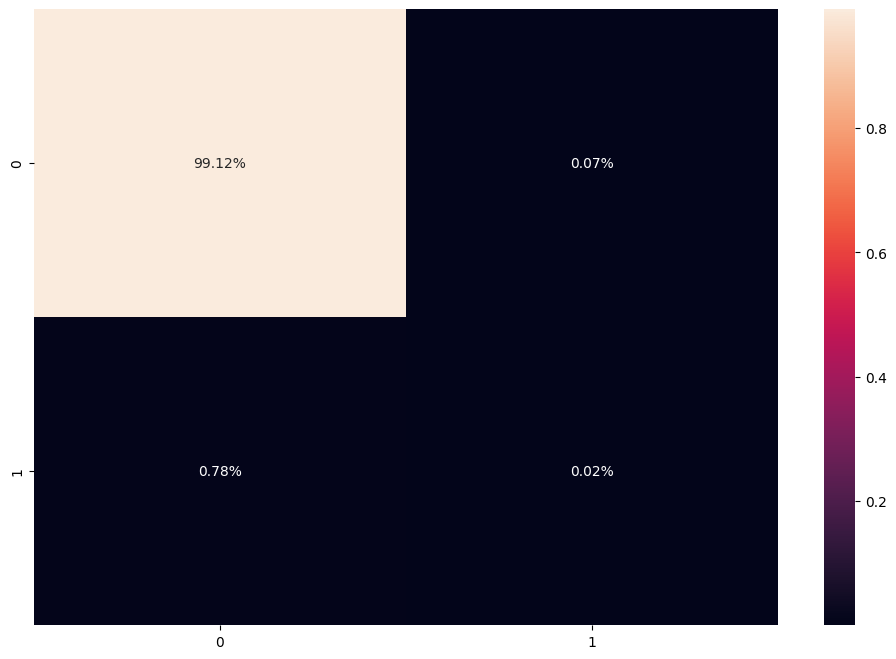

In [53]:
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%')
plt.show()

### K-Nearest Neighbors

In [54]:
knn = KNeighborsClassifier()

In [55]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Number of neighbors to use
    'weights': ['uniform', 'distance'],  # Weight function used in prediction
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  # Algorithm used to compute the nearest neighbors
    'leaf_size': [20, 30, 40],  # Leaf size passed to BallTree or KDTree
    'p': [1, 2],  # Power parameter for the Minkowski metric
    'metric': ['euclidean', 'manhattan', 'minkowski']  # Distance metric to use
}


In [56]:
grid_cv = GridSearchCV(knn, param_grid, cv=2, n_jobs=10, verbose=1)

In [57]:
grid_cv.fit(X_train_scaled, y_train)

Fitting 2 folds for each of 720 candidates, totalling 1440 fits


KeyboardInterrupt: 